In [1]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['lines.linewidth'] = 1.5

font = {'weight' : 'normal',
      'size'   : 12}

plt.rc('font', **font)

import fair
fair.__version__

'1.0.1'

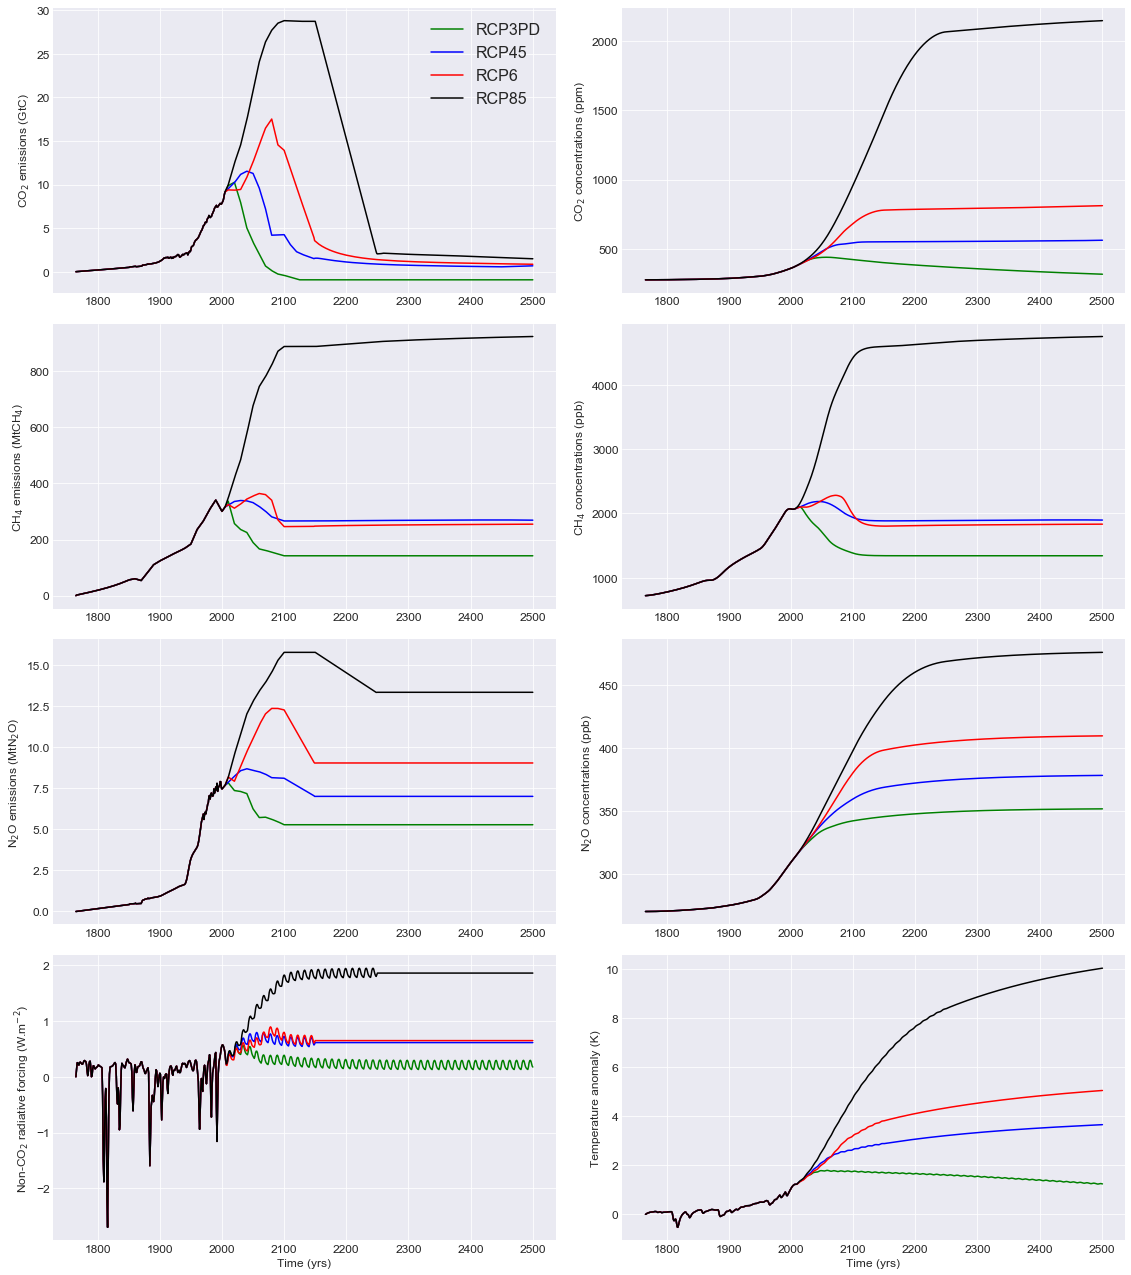

In [2]:
fig = plt.figure(figsize=(16,18))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)

rcps = ['RCP3PD','RCP45','RCP6','RCP85']
colours = ['green','blue','red','black']

for i,rcp in enumerate(rcps):
    emms_file = './fair/RCPs/' + rcp + '_EMISSIONS.csv'
    emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
    emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
    M_emissions = emms_data['CH4']
    N_emissions = emms_data['N2O']
    
    forc_file = './fair/RCPs/' + rcp + '_MIDYEAR_RADFORCING.csv'
    forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
    other_rf = forc_data['TOTAL_INCLVOLCANIC_RF'] - forc_data['CO2_RF']
    
    C,T,RF,M,N = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,
                            other_rf=other_rf)
    
    fair.forward.plot_fair(emissions,M_emissions,N_emissions,
              C,M,N,
              other_rf,
              T,
              y_0=1765,
              tuts='yrs',
              infig=fig,
              inemmsax=ax1,
              inconcax=ax2,
              inM_emmsax=ax3,
              inM_concax=ax4,
              inN_emmsax=ax5,
              inN_concax=ax6,
              inforcax=ax7,
              intempax=ax8,
              colour={'emms':colours[i],
                     'conc':colours[i],
                     'forc':colours[i],
                     'temp':colours[i]},
              label=rcp
             )